# The centre of mas of a sapcecraft is moved to within 1 m of the inner Lagrangian equilibrium point of Io, one of the moons of Jupiter. Assuming that an analytical solution based on linear stability analysis is always valid, calculate how long it would be before the spacecraft hits the surface of Io.

We will use the following equations:
$$ \lambda^4 + (2 - \bar{A}) \lambda^2 + (1 + \bar{A} - 2 \bar{A}^2) = 0$$
$$ \bar{A} = \frac{\mu_{1}}{(r_{1}^3)_{0}} + \frac{\mu_{2}}{(r_{2}^3)_{0}} $$
$$ r_{1} + r_{2} = 1 $$
$$ \bar{\mu} = \frac{m_{1}}{m_{1} + m_{2}} = \mu_{2} $$
$$ \mu_{1} = 1 - \bar{\mu}$$
$$ r_{2} = \alpha - \frac{1}{3} \alpha^2 - \frac{1}{9} \alpha^3 - \frac{23}{81} \alpha^4 $$
$$ \alpha = (\frac{\mu_{2}}{3 \mu_{1}})^{\frac{1}{3}} $$

For our known values, we know the semi-major axis of the Jupiter Io system is a = 421600 km. The mass of Io is 893.3x10^20 kg and the mass of Jupiter is 1898.6x10^24 kg. The first thing we want to do is get the 1 m distance from the L1 point in terms of the semi-major axis.

In [13]:
a = 421600000.0 # semi major axis
e = 0.0041 # eccentricity of orbit
m_Io = 893.3 * 10**20 # mass of Io
m_jup = 1898.6 * 10**24 # mass of Jupiter
rp = a*(1-e)
ra = a*(1+e)
radius = (rp+ra)/2 # average radius of orbit
scale = 1/radius
print scale

2.37191650854e-09


In [14]:
from math import sqrt
mu_2 = m_Io/(m_jup + m_Io)
mu_1 = 1 - mu_2
alpha = (mu_2/(3*mu_1))**(1/3.0)
r_2 = alpha - 1/3.0 * (alpha**2) - 1/9.0 * (alpha**3) - 23/81.0 * (alpha**4)
r_1 = 1 - r_2
print r_1 # the distance to Jupiter from L1
print r_2 # the distance to Io from L1
x = r_1 - mu_2
print x # Location of L1 point
d = sqrt(2)/2 * scale
print d # starting displacements X and Y

0.975179553231
0.0248204467688
0.975132504987
1.6771982476e-09


In [15]:
A = mu_1/(r_1)**3 + mu_2/(r_2)**3

In [16]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
lambdas = solve(x**4 +(2 - A)*x**2 + (1+A-2*A**2),x) # solving for the eigenvalues using the characteristic equation
print lambdas

[-2.56974982664786, 2.56974982664786, -2.1091324078454*I, 2.1091324078454*I]


Now using these lambdas, we can create a system of equations that will give us the constants in the equations for the X and Y position of the satellite. We will now use a new set of equations.
$$ \alpha_{1} + \alpha_{2} + \alpha_{3} + \alpha_{4} = X_{0} $$
$$ \lambda_{1} \alpha_{1} + \lambda_{2} \alpha_{2} + \lambda_{3} \alpha_{3} + \lambda_{4} \alpha_{4} = \dot{X}_{0} $$
$$ \beta_{1} + \beta_{2} + \beta_{3} + \beta_{4} = Y_{0} $$
$$ \lambda_{1} \beta_{1} + \lambda_{2} \beta_{2} + \lambda_{3} \beta_{3} + \lambda_{4} \beta_{4} = \dot{Y}_{0} $$
$$ \beta = \frac{\lambda^2 - U_{xx}}{2 \lambda + U_{xy}} \alpha $$
$$ U_{xx} = 1 + 2 \bar{A}$$
$$ U_{xy} = 0 $$
In this case X0 = d and while Y0 = 0.

In [17]:
U_xx = 1 + 2*A
U_xy = 0
B_1 = (lambdas[0]**2 - U_xx)/(2*lambdas[0] + U_xy)
B_2 = (lambdas[1]**2 - U_xx)/(2*lambdas[1] + U_xy)
B_3 = (lambdas[2]**2 - U_xx)/(2*lambdas[2] + U_xy)
B_4 = (lambdas[3]**2 - U_xx)/(2*lambdas[3] + U_xy) # in this case the values for beta would be the B values times alpha

In [40]:
from sympy import *
from sympy.matrices import *
a = Matrix([[1,1,1,1],[lambdas[0],lambdas[1],lambdas[2],lambdas[3]],[B_1,B_2,B_3,B_4],[lambdas[0]*B_1, lambdas[1]* \
    B_2, lambdas[2]*B_3,lambdas[3]*B_4]])
b = Matrix([d,d,0,0])
alphas = a.LUsolve(b)
alphas = alphas.tolist()
print alphas
# couldn't get any of the linear solvers to work with complex numbers, so I have it treated as a symbol and extract
# the values below to use in future calculations.

[[7.17643737768007e-10 + 0.1945714694929*(-2.05379541635624e-10 - 4.65259285655979e-11*I)*(2.56974982664786 + 2.1091324078454*I) - 0.270711415665397*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I)) + 4.65259285655979e-11*I + 0.0526727179545197*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I))*(2.56974982664786 - 2.1091324078454*I)], [1.16493405146379e-9 - 0.0526727179545197*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I))*(2.56974982664786 - 2.1091324078454*I) - 0.1945714694929*(-2.05379541635624e-10 - 4.65259285655979e-11*I)*(2.56974982664786 + 2.1091324078454*I)], [0.270711415665397*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I))], [-2.05379541635624e-10 - 4.65259285655979e-11*I]]


In [41]:
I = 1j #reverts back from symbol to imaginary number
A_1 = 7.17643737768007e-10 + 0.1945714694929*(-2.05379541635624e-10 - 4.65259285655979e-11*I)*(2.56974982664786 + \
    2.1091324078454*I) - 0.270711415665397*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - \
    4.65259285655979e-11*I)) + 4.65259285655979e-11*I + 0.0526727179545197*I*(3.43730820890867e-10 - \
    3.69397056101991*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I))*(2.56974982664786 - 2.1091324078454*I)
A_2 =1.16493405146379e-9 - 0.0526727179545197*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - \
    4.65259285655979e-11*I))*(2.56974982664786 - 2.1091324078454*I) - 0.1945714694929*(-2.05379541635624e-10 - \
    4.65259285655979e-11*I)*(2.56974982664786 + 2.1091324078454*I)
A_3 = 0.270711415665397*I*(3.43730820890867e-10 - 3.69397056101991*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I))
A_4 = -2.05379541635624e-10 - 4.65259285655979e-11*I
alphas = [A_1,A_2,A_3,A_4]
print alphas

[(7.558300789928291e-10+4.1359030627651384e-25j), (1.332127251874592e-09-2.1971985020939798e-25j), (-2.0537954163562412e-10+4.6525928565597696e-11j), (-2.05379541635624e-10-4.65259285655979e-11j)]


Note that the first two values for alpha still have small imaginary bits. since these parts are all on the order of 10^-25 as opposed to the 10^-09 values for the real parts of the numbers, we can assume that these are due to rounding and computational errors and discard them, using only the real portion.

In [42]:
I = 1j
alphas = [7.558300789928291e-10, 1.332127251874592e-09, -2.0537954163562412e-10+4.6525928565597696e-11j, \
        -2.05379541635624e-10-4.65259285655979e-11j]
betas = [alphas[0]*B_1, alphas[1]*B_2, alphas[2]*B_3, alphas[3]*B_4]
# these initial values for betas, if printed out below, are not in the most simplified state, so I printed them out,
# copied them, and plugged them back into betas
betas = [3.98060506983723e-10, -7.01569392362148e-10, -3.26171765653751*I*(-2.05379541635624e-10 + \
        4.65259285655977e-11*I), 3.26171765653751*I*(-2.05379541635624e-10 - 4.65259285655979e-11*I)]
print "alphas = " + str(alphas)
print "betas = " + str(betas)

alphas = [7.558300789928291e-10, 1.332127251874592e-09, (-2.0537954163562412e-10+4.6525928565597696e-11j), (-2.05379541635624e-10-4.65259285655979e-11j)]
betas = [3.98060506983723e-10, -7.01569392362148e-10, (1.5175444268921295e-10+6.698900772444955e-10j), (1.517544426892136e-10-6.698900772444955e-10j)]


These values let us now create the complete equations for the X and Y position of the Satellite as it's orbit evolves through time. We can do this since we know
$$ x(t) = \alpha_{1} e^{\lambda_{1} t} + \alpha_{2} e^{\lambda_{2} t} + \alpha_{3} e^{\lambda_{3} t} + \alpha_{4} e^{\lambda_{4} t} $$
$$ y(t) = \beta_{1} e^{\lambda_{1} t} + \beta_{2} e^{\lambda_{2} t} + \beta_{3} e^{\lambda_{3} t} + \beta_{4} e^{\lambda_{4} t} $$

These equations can be further simplified due to Euler's identity.
$$ e^{it} = cos(t) + i sin(t) $$

This leaves us with the following solution for the evolution of the orbit in the x direction (with rounding on the values).
$$ X(t) = 7.5583 \times 10^{-10} e^{-2.569 t} + 1.3321 \times 10^{-9} e^{2.569 t} +(-2.0538 \times 10^{-10}+4.6526 \times 10^{-11} i) e^{-2.109i t} +(-2.0538 \times 10^{-10}-4.6526 \times 10^{-11} i) e^{2.109i t} $$

$$ X(t) = 7.5583 \times 10^{-10} e^{-2.569 t} + 1.3321 \times 10^{-9} e^{2.569 t} -2.0538 \times 10^{-10} e^{-2.109it} + 4.6526 \times 10^{-11} i e^{-2.109it} - 2.0538 \times 10^{-10} e^{2.109it} - 4.6526 \times 10^{-11} i e^{2.109it} $$

This can then be rewritten using Euler's identity and further simplified down.
$$ X(t) = 7.5583 \times 10^{-10} e^{-2.569 t} + 1.3321 \times 10^{-9} e^{2.569 t} -2.0538 \times 10^{-10} cos(2.109t) + 2.0538 \times 10^{-10} i sin(2.109t) + 4.6526 \times 10^{-11} i cos(2.109t) + 4.6526 \times 10^{-11} sin(2.109t) - 2.0538 \times 10^{-10} cos(2.109t) - 2.0538 \times 10^{-10} i sin(2.109t) - 4.6526 \times 10^{-11} i cos(2.109t) + 4.6526 \times 10^{-11} sin(2.109t) $$

$$ X(t) = 7.5583 \times 10^{-10} e^{-2.569 t} + 1.3321 \times 10^{-9} e^{2.569 t}  - 4.1076 \times 10^{-10} cos(2.109t) + 9.304 \times 10^{-11} sin(2.109t) $$

A similar method can be taken for the solution in the y direction.
$$ Y(t) = 3.9806 \times 10^{-10} e^{-2.569 t} - 7.0157 \times 10^{-10} e^{2.569 t} + (1.5175 \times 10^{-10} + 6.6989 \times 10^{-10} i) e^{-2.109i t} + (1.5175 \times 10^{-10} - 6.6989 \times 10^{-10} i) e^{2.109i t} $$

$$ Y(t) = 3.9806 \times 10^{-10} e^{-2.569 t} - 7.0157 \times 10^{-10} e^{2.569 t} + 1.5175 \times 10^{-10} e^{-2.109i t} + 6.6989 \times 10^{-10} i e^{2.109i t} + 1.5175 \times 10^{-10} e^{-2.109i t} - 6.6989 \times 10^{-10} i e^{2.109i t} $$

$$ Y(t) = 3.9806 \times 10^{-10} e^{-2.569 t} - 7.0157 \times 10^{-10} e^{2.569 t} + 1.5175 \times 10^{-10} cos(2.109t) - 1.5175 \times 10^{-10} i sin(2.109t) + 6.6989 \times 10^{-10} i cos(2.109t) + 6.6989 \times 10^{-10} sin(2.109t) + 1.5175 \times 10^{-10} cos(2.109t) + 1.5175 \times 10^{-10} i sin(2.109t) - 6.6989 \times 10^{-10} i cos(2.109t) + 6.6989 \times 10^{-10} sin(2.109t) $$

$$ Y(t) = 3.9806 \times 10^{-10} e^{-2.569 t} - 7.0157 \times 10^{-10} e^{2.569 t} + 3.035 \times 10^{-10} cos(2.109t) + 13.3978 \times 10^{-10} sin(2.109t) $$

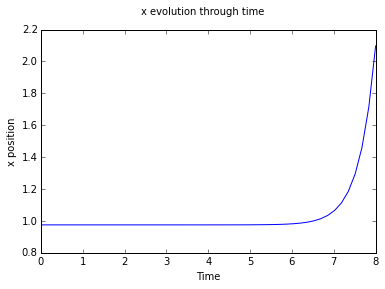

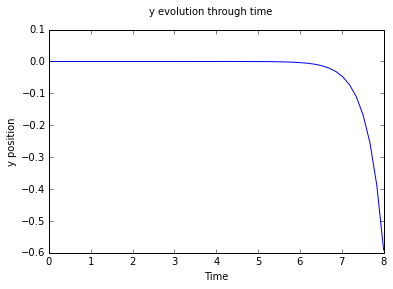

In [58]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(0,8) # range of time we'll graph
x = []
y = []
for t in z:
    x.append(0.975132504987+7.5583*10**(-10)*e**(-2.569*t) + 1.3321*10**(-9)*e**(2.569*t) - \
            4.1076*10**(-10)*cos(2.109*t) + 9.304*10**(-11)*sin(2.109*t))
    # Here, I use x and y, not X and Y, though Y and y are essentially the same in these units.
    y.append(3.98064*10**(-10)*e**(-2.569*t) - 7.0157*10**(-10)*e**(2.569*t) + 3.0354*10**(-10)*cos(2.109*t) +\
            13.3978*10**(-10)*sin(2.109*t))
plt.plot(z,x)
plt.suptitle("x evolution through time")
plt.xlabel("Time")
plt.ylabel("x position")
plt.show()
plt.plot(z,y)
plt.suptitle("y evolution through time")
plt.xlabel("Time")
plt.ylabel("y position")
plt.show()

In this above graphs, we take the notion that x = x0 + X and y = y0 + Y where x0 was calculated above and y0 = 0. Thus the two graphs shown are drawn with the reference frame that x=y=0 is jupiter and x = 1, y = 0 is Io. Now, if we desire to find how long it will take for the satellite to crash into Io, it is going to be when x^2 + y^2 = radius of Io^2.

In [122]:
from scipy.optimize import fsolve
radius = 1821000
r_Io = radius * scale
def x(t):
    return (-0.0248204467688+7.5583*10**(-10)*e**(-2.569*t) + 1.3321*10**(-9)*e**(2.569*t) - \
            4.1076*10**(-10)*cos(2.109*t) + 9.304*10**(-11)*sin(2.109*t))
    # now x is being treated as the distance away from the center of Io
def y(t):
    return (3.98064*10**(-10)*e**(-2.569*t) - 7.0157*10**(-10)*e**(2.569*t) + 3.0354*10**(-10)*cos(2.109*t) + \
            13.3978*10**(-10)*sin(2.109*t))
def f(t):
    return ((y(t))**2 + (x(t))**2 - (r_Io**2)) # a^2 +b^2 = c^2
x_time = fsolve(f,8)
print x_time

[ 6.4210784]


Now we can show this point on our graphs and obtain the final values of x and y position. We will zoom the graph in from before.

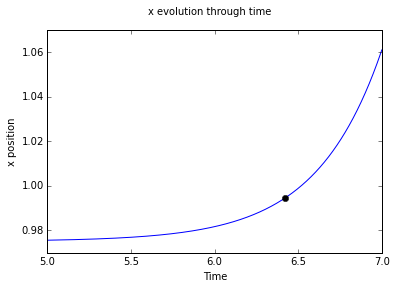

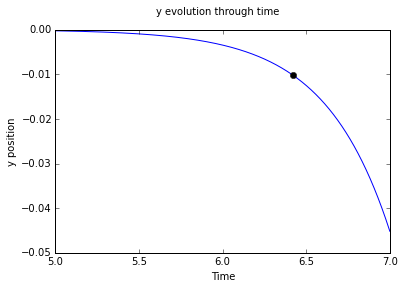

The final position of the satellite relative to Jupiter and Io is x = [ 0.99456597] and y = [-0.01023492]
The time it will take the satallite to crash into Io's surface is t = [ 6.4210784]


In [124]:
z = np.arange(5,7, .001)
def x(t):
    return (0.975132504987+7.5583*10**(-10)*e**(-2.569*t) + 1.3321*10**(-9)*e**(2.569*t) - 4.1076*10**(-10)*cos(2.109*t) + \
             9.304*10**(-11)*sin(2.109*t))
    # reverting back to using x as measured from Jupiter, where Jupiter to Io is 1
plt.plot(z,x(z), x_time, x(x_time), 'ko')
plt.suptitle("x evolution through time")
plt.xlabel("Time")
plt.ylabel("x position")
plt.show()
plt.plot(z,y(z), x_time, y(x_time), 'ko')
plt.suptitle("y evolution through time")
plt.xlabel("Time")
plt.ylabel("y position")
plt.show()

print "The final position of the satellite relative to Jupiter and Io is x = " + str(x(x_time)) + " and y = " + str(y(x_time))
print "The time it will take the satallite to crash into Io's surface is t = " + str(x_time)